Jingjie Ma   
ANLY 590 HW 1   
jm3292

### Problem 1

In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [67]:
# read in the data
data = pd.read_csv("Hitters.csv")
# drop na in the dataset
data = data.dropna()
print(data.columns)

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


In [68]:
# define y as the salary
y = data.Salary
# first drop the name column, which is irrelavant
# then drop the salary column and all categorical variables
X_ = data.drop(['Unnamed: 0','Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the predictors
dummies = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
# define those categorical variables as dummy variables for regression purposes
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
print(X.head())

   AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5      

In [69]:
# define alphas
alphas = 10**np.linspace(6,-2,50)*0.5

In [70]:
# fit the lasso model for each alpha
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    

(50, 19)

Text(0, 0.5, 'weights')

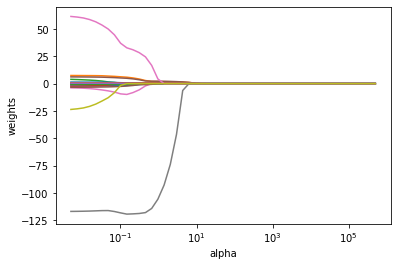

In [71]:
x_plot = plt.gca()
x_plot.plot(alphas, coefs)
# Since alphas varies in magnitude, use log of alpha to show the graph
x_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')

In [73]:
# using 40% data as testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
# use 10-fold cross validation
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
# set a set of penality
lasso.set_params(alpha=lassocv.alpha_)
print("Optimal value of the regularization penality is ", lassocv.alpha_)
lasso.fit(X_train, y_train)
# get the least mse
print("Optimal MSE is ",mean_squared_error(y_test, lasso.predict(X_test)))
print("Coefficients in the optimal model")
pd.Series(lasso.coef_, index=X.columns)

Optimal value of the regularization penality is  2.3327311765926555
Optimal MSE is  132568.611898037
Coefficients in the optimal model


AtBat           0.000000
Hits            2.319431
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           1.312234
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.000000
CRuns           0.378674
CRBI            0.289648
CWalks          0.000000
PutOuts         0.049478
Assists        -0.000000
Errors          0.000000
League_N       18.238258
Division_W    -70.030558
NewLeague_N     0.000000
dtype: float64

The optimal value of the regularization penality is 2.3327311765926555
There are only 7 variables left in the model.    
Ultimately, the final three varaibles will be Division, league, and hits. 

In [ ]:
# Visualize coeffecient trajectories of the ridge regression
ridge = Ridge(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    


Text(0, 0.5, 'weights')

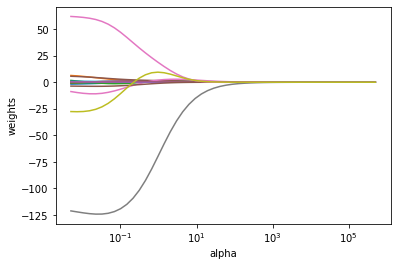

In [78]:
x_plot = plt.gca()
x_plot.plot(alphas, coefs)
# Since alphas varies in magnitude, use log of alpha to show the graph
x_plot.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')

In [75]:
# fit the ridge regression
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)
# get the optimal value of the regularization penality
print("The optimal value of the regularization penality is ", ridgecv.alpha_)
ridge_mod = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_mod.fit(X_train, y_train)
# get the mse
print("Optimal MSE is ",mean_squared_error(y_test, ridge_mod.predict(X_test)))
print("Coefficients in the optimal model")
pd.Series(ridge_mod.coef_, index=X.columns)

The optimal value of the regularization penality is  0.6628556827950555
Optimal MSE is  133945.09640067484
Coefficients in the optimal model


AtBat           0.147874
Hits            0.965208
HmRun          -0.561076
Runs            1.376327
RBI             0.699032
Walks           1.373229
Years           4.483471
CAtBat          0.015858
CHits           0.064186
CHmRun          0.404260
CRuns           0.130766
CRBI            0.125603
CWalks          0.035318
PutOuts         0.084546
Assists         0.006060
Errors          0.239744
League_N       49.954945
Division_W    -77.176949
NewLeague_N     1.539782
dtype: float64

The optimal value of the regularization penality is  0.6628556827950555

### Problem 2

The goal of fitting machine learning problems is to find a model that both captures important relationship between predictors and the response as well as being generalizable to the testing set. The bias variance tradeoff basically states that it is impossible to minimize two types or error, namely, bias and variance, in the same time. A model with higher variance will produce lower MSE in the training set but may suffer from overfitting. However, a high bias model could be too simple to capture useful relationship between the response and the predictors.    

Both the lasso regression and the ridge regression are helpful when there are a large number of predictors and some of them might not be linearly independent. These two methods will penalize variables with large coefficient in order to avoid overfitting the data by trading off an increase in bias with a decrease in variance. However, the lasso regression will shrink certain coefficients to to eliminate them from the final model but ridge will shrink some coefficients close to zero to reduce their impact on the model.   

As we can see in problem 1, when the penality value is relatively smaller, the coefficients are larger in absoulte value. In this case, the variance of the model is relatively higher because overfitting is possible. When the penality value is relatively larger, some coefficients shrink to zero in the lasso case and some coefficient are approaching zero in the ridge case. The bias is relatively higher because the model is simpler and could underfit the testing set. 